
# Using the Numerov Method to find the eigenvalues of the 1-dimensional Schrodinger's Equation in a potential well
The time independent 1-dimensional Schrodinger equation can be solved numerically using the Numerov method. This is done by discrete variable representation, where the continous function is approximated as a discrete function.
First, we begin with the typical Schrodinger equation,

$$
-\frac{\hbar^2}{2m}\psi''(x), + V(x)\psi(x) = E\psi(x) \tag{1}
$$

which we can rearrange into 

$$
\psi''(x) = -\frac{2m}{\hbar^2}[E-V(x)]\psi(x) \tag{2}
$$

If we let

$$
k^2(x) = -\frac{2m}{\hbar^2}[E-V(x)] \tag{3}
$$

Then, 
$$
\psi''(x) = k^2\psi(x) \tag{4}
$$

Using the Numerov method to discretize the variable x,

$$
f_i''\approx\frac{1}{\delta x^2} (f(x_{x+1})-2f(x_i)+f(x_{x-1}))- \frac{\delta x^2}{12}\tag{5}
$$ 

From this, we can get an iterative equation that can be used to graph the wavefunction

$$
\psi(x_i+1)=\frac{\psi(x_i)(2+\frac{10h^2}{12}k^2(x_i))-\psi(x_{x-1})(1-\frac{h^2}{12}k^2(x_{x-1}))}{1-\frac{h^2}{12}k^2(x_{x+1})} \tag{6}
$$

Where h = step-size.

Finally, considering the potential well, our wavefunction will have to cross some boundaries. At these boundaries, the wavefunction must be continous from both the left and right directions. Thus from these continuity conditions and the three point formula, we can obtain,

$$
f\left(E\right)=\frac{\left[\psi_l\left(x_r+h\right)-\psi_l\left(x_r-h\right)\right]}{2h\psi_l\left(x_r\right)}-\frac{\left[\psi_r\left(x_r+h\right)-\psi_r\left(x_r-h\right)\right]}{2h\psi_r\left(x_r\right)}=0 \tag{7}
$$

Where $x_r$ can be one of the boundaries of the potential well.

So how are we going to do it?
1. Graph out the potential

2. Create code that can find the intersection points between any given E and V(x).

3. Using equation (6), we create code that can plot a graph of $\psi$(x), from left to right and right to left, meeting at one of the turning points.

4. Using equation (7), we create code that can find the values of E where the continuity conditions are valid.

But before all that, let us initalise our constants and call libraries

In [333]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root_scalar
from scipy.optimize import fsolve
hbar = 1  
m = 1 
alpha = 1 
lambda_symbol = 4 
#Range for x
x0, xf = -10, 10
# Step size
h = 0.05   

## Step 1: Graphing the potential well

The potential well given in this question is a function, rather than a constant value, like in the infinite and finite square well problems. Nevertheless, the way to tackle the solutions are still similar.

$$
V\left(x\right)=\frac{\hbar^2}{2m}\alpha^2\lambda\left(\lambda-1\right)\left[\frac 1 2-\frac{1}{\cosh^2{\left(\alpha x\right)}}\right]
$$

To test our solutions, we first calculate known eigenvalues, which are given by the equation
$$
E_n=\frac{\hbar^2}{2m}\alpha^2\left[\frac{\lambda\left(\lambda-1\right)}{2}-\left(\lambda-1-n\right)^2\right], n = 0, 1, 2, 3, ....
$$

In [334]:
n = 10
def exacteigen(n):
    return hbar ** 2 / (2 * m) * alpha ** 2 * (lambda_symbol * (lambda_symbol - 1) / 2 - (lambda_symbol - 1 - n) ** 2)
for k in range(1,n+1) :
    print("when n = ", k, "E=",exacteigen(k))



when n =  1 E= 1.0
when n =  2 E= 2.5
when n =  3 E= 3.0
when n =  4 E= 2.5
when n =  5 E= 1.0
when n =  6 E= -1.5
when n =  7 E= -5.0
when n =  8 E= -9.5
when n =  9 E= -15.0
when n =  10 E= -21.5


Using E = 2.5, we now graph the potential well

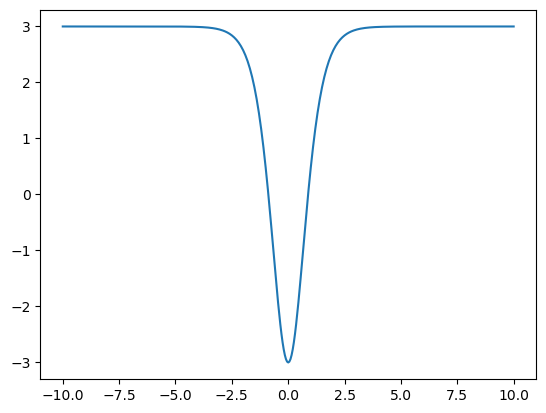

In [335]:
def V(x):
    return (hbar**2)*(alpha**2)*lambda_symbol*(lambda_symbol-1)*((1/2)-(1/(np.cosh(alpha*x)**2)))/2*m

x = np.arange(x0, xf + h, h)
plt.plot(x,V(x))
plt.show()

## Step 2: Root finding method for values of E and V(x), using a test value of E which is a known eigenvalue.
We can use the inbuilt fsolve function to root find in this situation.

In [336]:

def f_root(x,E):
    return V(x)-E
E=2.5
positiveroot = fsolve(f_root,5,E)
print ("The positive root is",positiveroot)
negativeroot = fsolve(f_root,-5,E)
print ("The negative root is",negativeroot)


The positive root is [1.91408424]
The negative root is [-1.91408424]


## Step 3: The Numerov method.
We iterate the equation until we reach one of the turning points of the equation. Since we are interested in the values near one of the turning points, we shall iterate $\psi_l$(x) and $\psi_r$(x) until both reach the 2nd turning point.

C:\Users\adamf\AppData\Local\Temp\ipykernel_29552\3686914852.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  xleft = np.arange(x0, positiveroot+h, h)
C:\Users\adamf\AppData\Local\Temp\ipykernel_29552\3686914852.py:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  xright = np.arange(positiveroot-h, xf, h)


<function matplotlib.pyplot.show(close=None, block=None)>

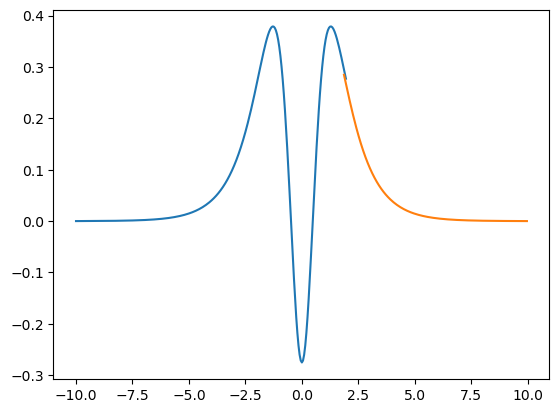

In [337]:
def numerov(E, x, h):
    N = len(x)
    psi = np.zeros(N)
    psi[0], psi[1] = 0.0, 1e-5
    
    f = lambda xi: 2 * m / hbar**2 * (E - V(xi))
    
    for i in range(1, N - 1):
        psi[i + 1] = (2 * (1 - 5 * h**2 * f(x[i]) / 12) * psi[i] - (1 + h**2 * f(x[i - 1]) / 12) * psi[i - 1]) / (1 + h**2 * f(x[i + 1])/ 12)
    
    return psi


xleft = np.arange(x0, positiveroot+h, h)
xright = np.arange(positiveroot-h, xf, h)
psileft = numerov(E, xleft, h)
psiright = numerov(E, xright[::-1], h)[::-1]

plt.plot(xleft,psileft)
plt.plot(xright,psiright)
plt.show



## Step 4. Implementing the equation F(E)
Now, we shall take all functions above, and run them into a range of E values. However, through computing the values for E and the normalised wavefunction, it was found that using this F(E), did not give good and accurate results.

C:\Users\adamf\AppData\Local\Temp\ipykernel_29552\428262862.py:2: RuntimeWarning: overflow encountered in square
  return (hbar**2)*(alpha**2)*lambda_symbol*(lambda_symbol-1)*((1/2)-(1/(np.cosh(alpha*x)**2)))/2*m
C:\Users\adamf\AppData\Local\Temp\ipykernel_29552\302579992.py:3: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  x_root = fsolve(f_root,5,E)
C:\Users\adamf\AppData\Local\Temp\ipykernel_29552\302579992.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  xleft = np.arange(x0, x_root+2*h, h)
C:\Users\adamf\AppData\Local\Temp\ipykernel_29552\302579992.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before perform

Numerical Eigenvalues:
E_0 = -1.500343
E_1 = 0.990296
E_2 = 2.498099

Exact Eigenvalues:
E_0 = -1.500000
E_1 = 1.000000
E_2 = 2.500000


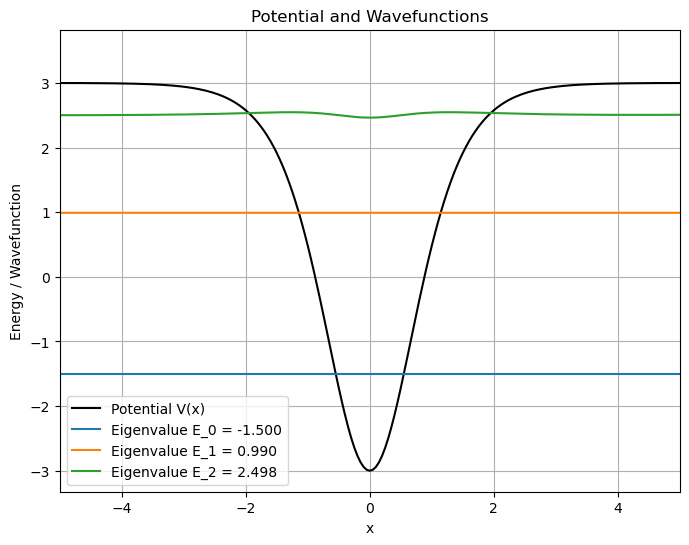

In [338]:
# Matching Condition using fsolve
def F(E, x, h):
    x_root = fsolve(f_root,5,E)

    xleft = np.arange(x0, x_root+2*h, h)
    xright = np.arange(x_root-h, xf, h)
    # Integrate from left
    psi_left = numerov(E, xleft, h)
    
    # Integrate from right
    psi_right = numerov(E, xright[::-1], h)[::-1]
    
    ratio_left = (psi_left[len(xleft)-1] - psi_left[len(xleft)-3]) / (2 * h * psi_left[len(xleft)-2])
    ratio_right = (psi_right[2] - psi_right[0]) / (2 * h * psi_right[1])
    
    return ratio_left - ratio_right

def find_eigenvalues(x, h, n_levels):
    eigenvalues = []
    
    # Initial guess range for energy
    E_start = [-5, 0, 2]
    E_end = [0, 5, 5]
    
    # NOTE: -5, 0 ---> E_0 found only
    #        0, 5 ---> E_1 found only
    
    for n in range(n_levels):
        energies = np.linspace(E_start[n], E_end[n], 100)
        
        for i in range(len(energies) - 1):
            E1, E2 = energies[i], energies[i + 1]
                        
            if F(E1, x, h) * F(E2, x, h) < 0:
                result = root_scalar(F, args=(x, h), bracket=[E1, E2], method='brentq')
                eigenvalues.append(result.root)
                break
        
    return eigenvalues
# Find the first 3 eigenvalues
n_levels = 3
eigenvalues = find_eigenvalues(x, h, n_levels)

# Print results
print("Numerical Eigenvalues:")
for i, E in enumerate(eigenvalues):
    print(f"E_{i} = {E:.6f}")

# Exact Eigenvalues
exact_eigenvalues = [(hbar**2 / (2 * m)) * alpha**2 * (lambda_symbol * (lambda_symbol - 1) / 2 - (lambda_symbol - 1 - n)**2) for n in range(n_levels)]
print("\nExact Eigenvalues:")
for i, E in enumerate(exact_eigenvalues):
    print(f"E_{i} = {E:.6f}")

# Plot Potential and Wavefunctions
plt.figure(figsize=(8, 6))
plt.plot(x, V(x), label="Potential V(x)", color='black')

for i, E in enumerate(eigenvalues):
    psi = numerov(E, x, h)
    plt.plot(x, psi / np.max(np.abs(psi)) + E, label=f"Eigenvalue E_{i} = {E:.3f}")


plt.xlabel("x")
plt.ylabel("Energy / Wavefunction")
plt.xlim(-5, 5)
plt.title("Potential and Wavefunctions")
plt.legend()
plt.grid()
plt.show()

## What the graph should look like
Below is what the graph of the wavefunctions and potential well should look like when graphed together and normalised.

Numerical Eigenvalues:
E_0 = -1.500001
E_1 = 0.999998
E_2 = 2.499998

Exact Eigenvalues:
E_0 = -1.500000
E_1 = 1.000000
E_2 = 2.500000


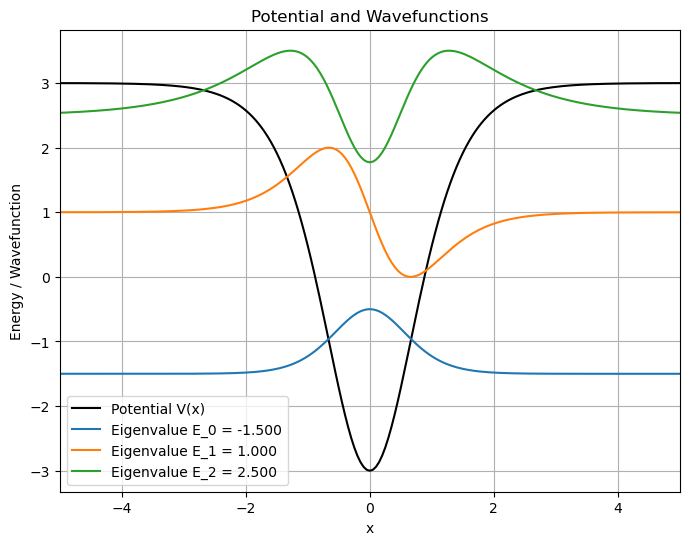

In [339]:
#
def F(E, x, h):
    N = len(x)
    
    # Integrate from left
    psi_left = numerov(E, x, h)
    
    # Integrate from right
    psi_right = numerov(E, x[::-1], h)[::-1]
    
    # Match at the midpoint
    x_match = N // 2
    ratio_left = (psi_left[x_match + 1] - psi_left[x_match - 1]) / (2 * h * psi_left[x_match])
    ratio_right = (psi_right[x_match + 1] - psi_right[x_match - 1]) / (2 * h * psi_right[x_match])
    
    return ratio_left - ratio_right

def find_eigenvalues(x, h, n_levels):
    eigenvalues = []
    
    # Initial guess range for energy
    E_start = [-5, 0, 2]
    E_end = [0, 5, 5]
    
    # NOTE: -5, 0 ---> E_0 found only
    #        0, 5 ---> E_1 found only
    
    for n in range(n_levels):
        energies = np.linspace(E_start[n], E_end[n], 100)
        
        for i in range(len(energies) - 1):
            E1, E2 = energies[i], energies[i + 1]
                        
            if F(E1, x, h) * F(E2, x, h) < 0:
                result = root_scalar(F, args=(x, h), bracket=[E1, E2], method='brentq')
                eigenvalues.append(result.root)
                break
        
    return eigenvalues
# Find the first 3 eigenvalues
n_levels = 3
eigenvalues = find_eigenvalues(x, h, n_levels)

# Print results
print("Numerical Eigenvalues:")
for i, E in enumerate(eigenvalues):
    print(f"E_{i} = {E:.6f}")

# Exact Eigenvalues
exact_eigenvalues = [(hbar**2 / (2 * m)) * alpha**2 * (lambda_symbol * (lambda_symbol - 1) / 2 - (lambda_symbol - 1 - n)**2) for n in range(n_levels)]
print("\nExact Eigenvalues:")
for i, E in enumerate(exact_eigenvalues):
    print(f"E_{i} = {E:.6f}")

# Plot Potential and Wavefunctions
plt.figure(figsize=(8, 6))
plt.plot(x, V(x), label="Potential V(x)", color='black')

for i, E in enumerate(eigenvalues):
    psi = numerov(E, x, h)
    plt.plot(x, psi / np.max(np.abs(psi)) + E, label=f"Eigenvalue E_{i} = {E:.3f}")


plt.xlabel("x")
plt.ylabel("Energy / Wavefunction")
plt.xlim(-5, 5)
plt.title("Potential and Wavefunctions")
plt.legend()
plt.grid()
plt.show()